### Prepare data

Get the data from the .csv file, place into "3d" structure so we can plot. x,y,z axes will represent different parameter values. Color and size of plotted point will represent accuracy

In [4]:
import os
import csv
import math
import numpy as np

# variables for files
id_str = 'project_cumulative'
csv_file_name = id_str + '.csv'
input_folder = os.getcwd() + '/../out/'
file = input_folder + csv_file_name
print("Opening " + file + '\n')

# csv column indices for: learning_rate, optimizer, filter_size, epochs, loss, accuracy
LEARNING_RATE = 0
OPTIMIZER = 1
FILTER_SIZE = 2
EPOCHS = 3
LOSS = 4
ACCURACY = 5

PLOT_SIZE = 4    # side length of 3d mesh for plotting
#PLOT_TYPE = 'Loss'
PLOT_TYPE = 'Accuracy'

# options passed to neural net
lr_opts = [1e-4, 1e-3, 1e-2]
opt_opts = ['p', 'c', 'm']
fs_opts = [12, 24, 36, 48]


# open the csv file
with open(file, newline='') as csvfile:
    log = csv.reader(csvfile, delimiter=',')
    
    # iterate through the headers file, but save it
    headers = next(log)
    
    # arrays for indexing/looping through 3d mesh. Mesh holds hit-rate vals
    xx = np.linspace(0,PLOT_SIZE,PLOT_SIZE+1) # cache size
    yy = np.linspace(0,PLOT_SIZE,PLOT_SIZE+1) # assoc
    zz = np.linspace(0,PLOT_SIZE,PLOT_SIZE+1) # block size
    
    # NN's with same parameters are run multiple times so we can average results:
    hh = np.meshgrid(np.zeros(PLOT_SIZE+1),np.zeros(PLOT_SIZE+1), np.zeros(PLOT_SIZE+1))[0]
    nn = np.meshgrid(np.zeros(PLOT_SIZE+1),np.zeros(PLOT_SIZE+1), np.zeros(PLOT_SIZE+1))[0]  
    
    # loop through log, filter by # instructions and replacement policy
    for idx, row in enumerate(log):
        
        # grab values from row in csv
        lr = float(row[LEARNING_RATE])
        op = row[OPTIMIZER]
        fs = int(row[FILTER_SIZE])
        ep = int(row[EPOCHS])
        loss = float(row[LOSS])
        acc = float(row[ACCURACY])
        val = 0

        xlab = 'Learning Rate'
        ylab = 'Optimizer'
        zlab = 'Filter Size'
        hlab = 'Loss | Accuracy'
        
        x = lr_opts.index(lr)
        y = opt_opts.index(op)
        z = fs_opts.index(fs)
        
        if PLOT_TYPE == 'Loss':
            val = loss        # store loss value to appropriate place in 3d mesh
            
        elif PLOT_TYPE == 'Accuracy':
            val = acc         # store accuracy value to appropriate place in 3d mesh
            
        else:
            print('error: plotting variable not recognized')

        hh[x,y,z] = hh[x,y,z] + val
        nn[x,y,z] = nn[x,y,z] + 1
        
    
    # average the results for each parameter set (point)
    for i in xx:
        for j in yy:
            for k in zz:
                i = int(i)
                j = int(j)
                k = int(k)
                
                if not nn[i,j,k] == 0:
                    hh[i,j,k] = hh[i,j,k] / nn[i,j,k]


# check
print(hh)                
        
                
    



Opening /Users/ethanblagg/SynologyDrive/UCCS/ECE 3610/HW/Project/src/../out/project_cumulative.csv

[[[0.7588  0.85425 0.86595 0.8953  0.     ]
  [0.75215 0.853   0.87355 0.8884  0.     ]
  [0.7867  0.85835 0.88425 0.89245 0.     ]
  [0.      0.      0.      0.      0.     ]
  [0.      0.      0.      0.      0.     ]]

 [[0.9253  0.9449  0.9528  0.9114  0.     ]
  [0.9351  0.9379  0.9396  0.9506  0.     ]
  [0.9261  0.9433  0.94855 0.9661  0.     ]
  [0.      0.      0.      0.      0.     ]
  [0.      0.      0.      0.      0.     ]]

 [[0.72525 0.34295 0.7569  0.3588  0.     ]
  [0.75335 0.0159  0.38955 0.40725 0.     ]
  [0.4041  0.32765 0.41225 0.3595  0.     ]
  [0.      0.      0.      0.      0.     ]
  [0.      0.      0.      0.      0.     ]]

 [[0.      0.      0.      0.      0.     ]
  [0.      0.      0.      0.      0.     ]
  [0.      0.      0.      0.      0.     ]
  [0.      0.      0.      0.      0.     ]
  [0.      0.      0.      0.      0.     ]]

 [[0.      0

### Plot data 3d

<IPython.core.display.Javascript object>


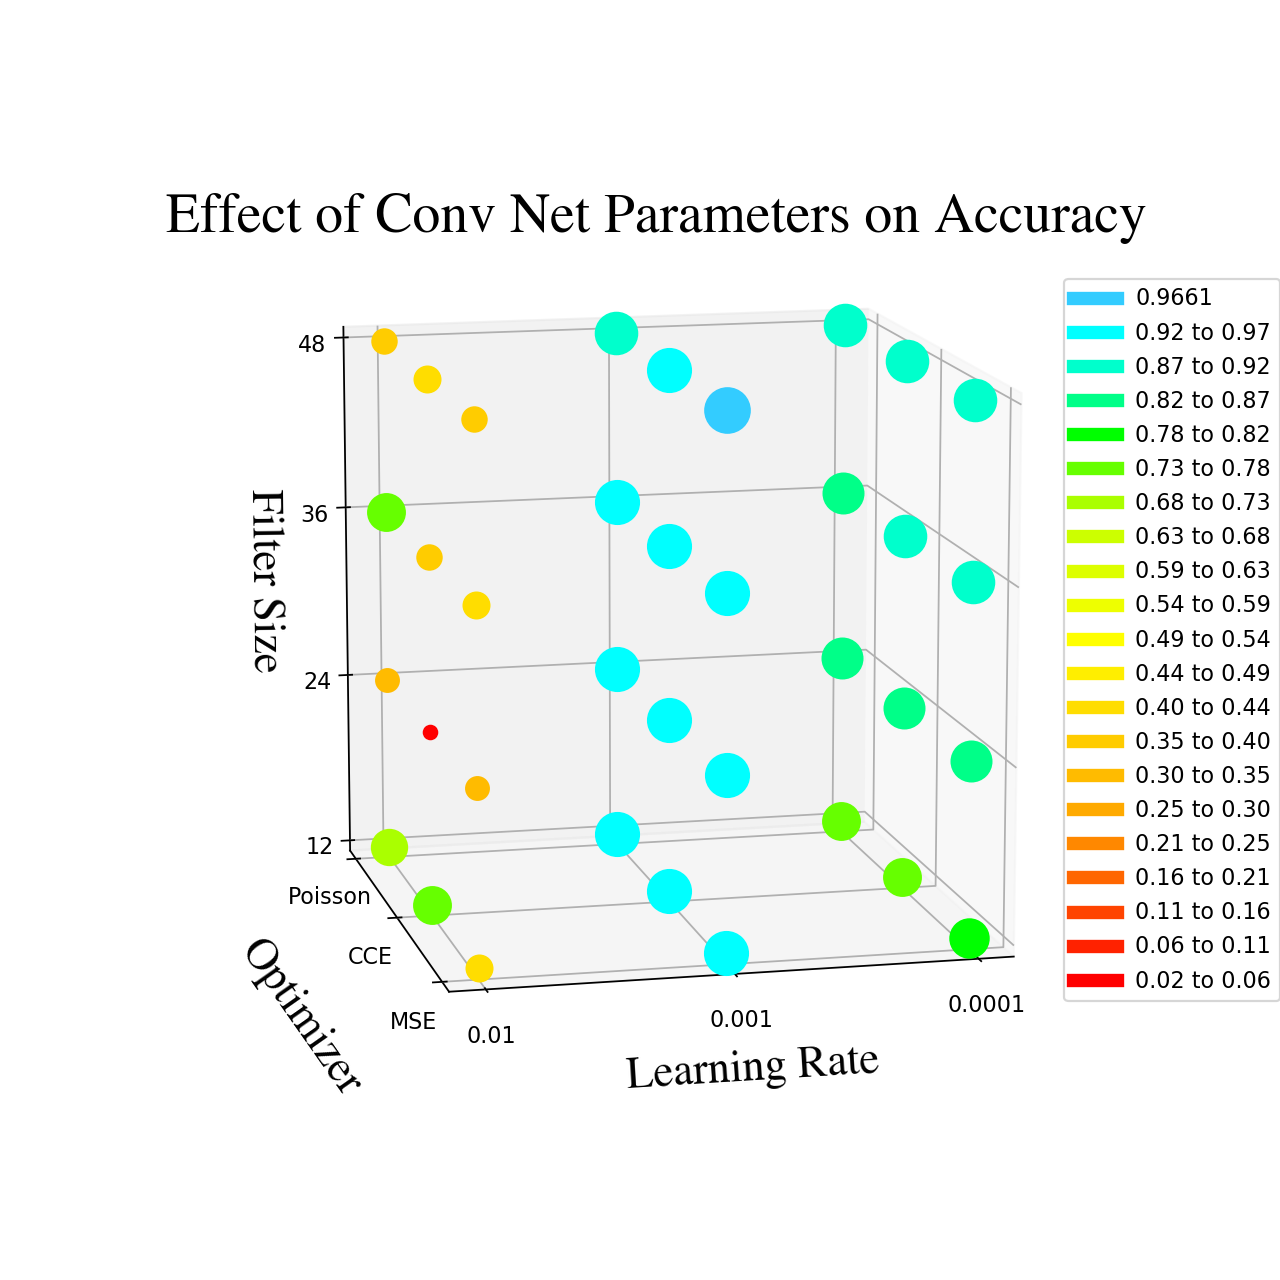

In [5]:
%matplotlib notebook    
# % indicates magic funciton -> runs command. Run %magic in a cell for more info

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D

xticks = lr_opts
yticks = ['Poisson', 'CCE', 'MSE']
zticks = fs_opts

fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(xlab, fontsize=20, labelpad=10, fontname='times')
ax.set_ylabel(ylab, fontsize=20, labelpad=20, fontname='times')
ax.set_zlabel(zlab, fontsize=20, labelpad=10, fontname='times')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(xticks))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(yticks))
ax.zaxis.set_major_formatter(ticker.FixedFormatter(zticks))
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(1.00))
#ax.zaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_major_locator(ticker.FixedLocator(np.linspace(0, len(xticks), len(xticks)+1)))
ax.yaxis.set_major_locator(ticker.FixedLocator(np.linspace(0, len(yticks), len(yticks)+1)))
ax.zaxis.set_major_locator(ticker.FixedLocator(np.linspace(0, len(zticks), len(zticks)+1)))

plt.title("Effect of Conv Net Parameters on " + PLOT_TYPE, 
          fontsize=25, 
          pad=0,
          fontname='times',
         )

# find the min and max values in hh, then linspace accordingly for color_range
minval = np.min(hh[np.nonzero(hh)])
maxval = np.max(hh[np.nonzero(hh)])

color_map = ['#ff0000','#ff2200','#ff4400','#ff6600','#ff8800','#ffaa00','#ffbb00','#ffcc00',
             '#ffdd00','#ffee00','#ffff00','#eeff00','#ddff00','#ccff00','#aaff00','#66ff00',
             '#00ff00','#00ff88','#00ffcc','#00ffff','#33ccff']

c_map_len = len(color_map)

color_range = np.linspace(minval, maxval, c_map_len)      # returns array that is c_map_len long
size_range = np.linspace(6, 20, c_map_len)

labels = []    # legend strings
nodisp = []    # lines that won't display, but will be used for custom legend
for i,color in enumerate(color_range):
    
    # strings for legend
    if i == c_map_len - 1:  
        labels.insert(0, str(color_range[i]))
    
    else:
        labels.insert(0, '{:.2f} to {:.2f}'.format(color_range[i], color_range[i+1]))
        
    # "lines" for legend
    nodisp.insert(0, Line2D([0],[0], color=color_map[i], lw=6))
    


for i in xx:
    for j in yy:
        for k in zz:
            i = int(i)
            j = int(j)
            k = int(k)
            
            if not hh[i, j, k] == 0:
            #if hh[i,j,k] > 0.968:
                idx = 0
                
                for r in range(0,c_map_len):
                    
                    if hh[i,j,k] >= color_range[r]:
                        idx = r
                        
                ax.plot([i], [j], [k] , 
                        marker='o', 
                        markersize=size_range[idx], 
                        color=color_map[idx],
                        label=labels[idx])
                #print('{} \t {} \t {} \t {}'.format(hh[i,j,k], color_range[idx], idx, color_map[idx]))


fig.legend(nodisp, labels, loc='center right', borderaxespad=0)

elev = 12       
angle = 77
ax.view_init(elev, angle)
plt.draw()
fig.savefig(input_folder + id_str + '_{}.png'.format(PLOT_TYPE))

### Plot data histogram

<IPython.core.display.Javascript object>


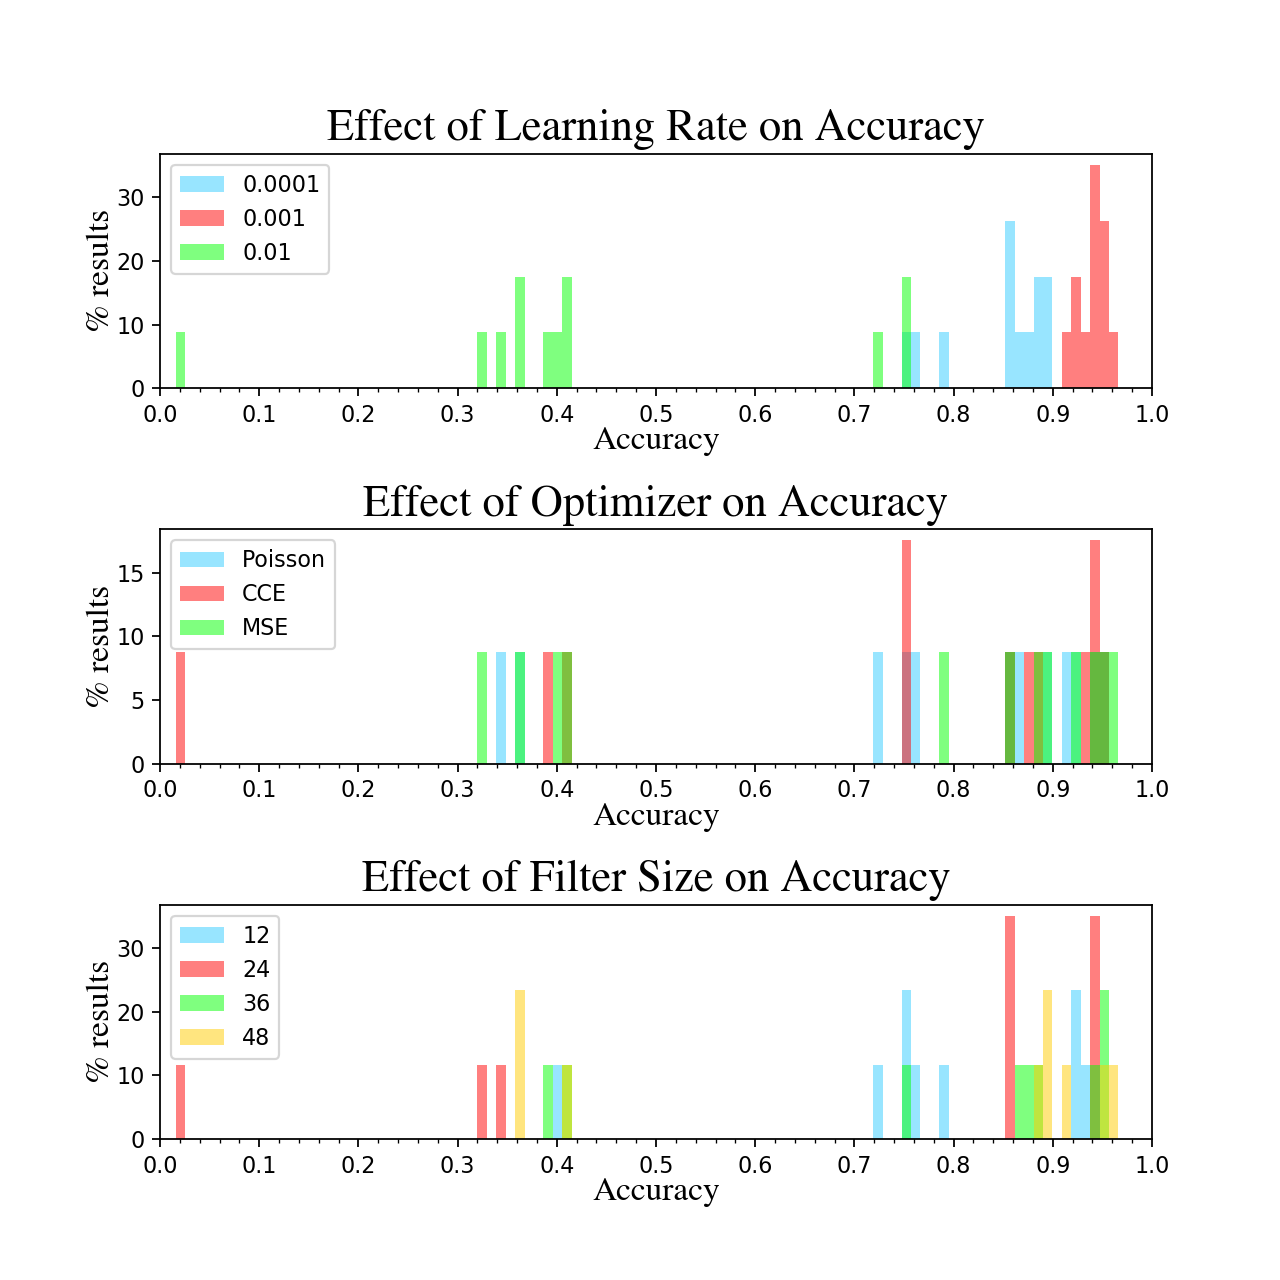

In [6]:


fig1 = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace = 0.6)

hist_colors = ['#33ccff', '#ff0000', '#00ff00', '#ffcc00']
kwargs = dict(histtype='bar', alpha=0.5, density=True, bins=100) #, ec="k")
hist_range = [minval, maxval]
title_sz = 20
x_sz = 15
font_nm = 'times'
legend_loc='upper left'
y_lab = '% results'



# learning rate histogram
ax = fig1.add_subplot(311)
ax.set_xlabel(PLOT_TYPE, fontsize=x_sz, labelpad=0, fontname=font_nm)
ax.set_ylabel(y_lab, fontsize=x_sz, labelpad=0, fontname=font_nm)
ax.set_title("Effect of {} on {}".format(xlab,PLOT_TYPE), fontsize=title_sz, fontname=font_nm)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
ax.set_xlim(0,1)
    
for i,v in enumerate(lr_opts):

    flat_vals = np.ndarray.flatten(hh[i,:,:])
    flat_inds = np.flatnonzero(hh[i,:,:])
    plt.hist(flat_vals[flat_inds], range=hist_range, label=xticks[i], color=hist_colors[i], **kwargs)
    ax.legend(loc=legend_loc)

    

    
# optimizer histogram
ax = fig1.add_subplot(312)
ax.set_xlabel(PLOT_TYPE, fontsize=x_sz, labelpad=0, fontname=font_nm)
ax.set_ylabel(y_lab, fontsize=x_sz, labelpad=0, fontname=font_nm)
ax.set_title("Effect of {} on {}".format(ylab,PLOT_TYPE), fontsize=title_sz, fontname=font_nm)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
ax.set_xlim(0,1)

for i,v in enumerate(opt_opts):

    flat_vals = np.ndarray.flatten(hh[:,i,:])
    flat_inds = np.flatnonzero(hh[:,i,:])
    plt.hist(flat_vals[flat_inds], range=hist_range, label=yticks[i], color=hist_colors[i], **kwargs)
    ax.legend(loc=legend_loc)
    

    
    
# filter size histogram
ax = fig1.add_subplot(313)
ax.set_xlabel(PLOT_TYPE, fontsize=x_sz, labelpad=0, fontname=font_nm)
ax.set_ylabel(y_lab, fontsize=x_sz, labelpad=0, fontname=font_nm)
ax.set_title("Effect of {} on {}".format(zlab,PLOT_TYPE), fontsize=title_sz, fontname=font_nm)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
ax.set_xlim(0,1)

for i,v in enumerate(fs_opts):

    flat_vals = np.ndarray.flatten(hh[:,:,i])
    flat_inds = np.flatnonzero(hh[:,:,i])
    plt.hist(flat_vals[flat_inds], range=hist_range, label=zticks[i], color=hist_colors[i], **kwargs)
    ax.legend(loc=legend_loc)

    
    
    

In [ ]:
print(np.linspace(0,1,4))